In [10]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)


%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6  


scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1
statsmodels: 0.8.0


In [3]:
# Wczytanie danych z pliku csv z uwzględnieniem kolumny z datą/czasem
data = pandas.read_csv('/home/pawelglica/Documents/magisterka/sales_org.csv',sep=';', parse_dates=['CLOSEDATETIME'], index_col='CLOSEDATETIME')

In [3]:
# Wyswietl nagłowek danych
data.head()

LOCATIONID  REVENUECENTERID  ORDERTYPEID  CHECKTOTAL
CLOSEDATETIME                                                            
2016-09-01 09:01:37       10041           185726     185937.0       16.46
2016-09-01 09:03:23       10041           185726     185937.0        8.95
2016-09-01 09:04:28       10041           185726     185937.0       17.95
2016-09-01 09:07:28       10041           185726     185937.0       14.95
2016-09-01 09:15:24       10041           185726     185937.0        5.95

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511551 entries, 2016-09-01 09:01:37 to 2018-02-28 22:46:44
Data columns (total 4 columns):
LOCATIONID         1511551 non-null int64
REVENUECENTERID    1511551 non-null int64
ORDERTYPEID        1511550 non-null float64
CHECKTOTAL         1511551 non-null float64
dtypes: float64(2), int64(2)
memory usage: 57.7 MB


In [63]:
# Wczytanie danych z pliku csv z uwzględnieniem kolumny z datą/czasem
data = pandas.read_csv('/home/pawelglica/Documents/magisterka/sales_org.csv',sep=';', parse_dates=['CLOSEDATETIME'], index_col='CLOSEDATETIME')

# Przygotowanie danych
ts = data['CHECKTOTAL']
all = ts['2016-09-01':'2018-02-28'].resample('D').sum()
train = ts['2016-09-01':'2017-08-31'].resample('D').sum()
test = ts['2017-09-01':'2018-02-28'].resample('D').sum()

print(test)
all.describe()

CLOSEDATETIME
2017-09-01    50589.52
2017-09-02    63757.81
2017-09-03    69193.32
2017-09-04    45908.92
2017-09-05    34366.62
2017-09-06    36158.71
2017-09-07    39767.57
2017-09-08    48733.86
2017-09-09    68305.30
2017-09-10    72163.42
2017-09-11    33014.44
2017-09-12    37263.84
2017-09-13    39555.82
2017-09-14    36651.55
2017-09-15    46687.95
2017-09-16    62797.66
2017-09-17    62826.81
2017-09-18    33283.89
2017-09-19    37525.75
2017-09-20    38562.08
2017-09-21    48279.09
2017-09-22    60368.62
2017-09-23    65135.02
2017-09-24    59700.41
2017-09-25    38476.33
2017-09-26    49532.75
2017-09-27    45980.25
2017-09-28    50724.90
2017-09-29    64122.56
2017-09-30    83635.61
                ...   
2018-01-30    41920.13
2018-01-31    43542.31
2018-02-01    43139.44
2018-02-02    54092.24
2018-02-03    71479.85
2018-02-04    57368.38
2018-02-05    37278.70
2018-02-06    39373.18
2018-02-07    39850.45
2018-02-08    41473.45
2018-02-09    60336.27
2018-02-10    73759.

count       546.000000
mean      51670.739377
std       13907.868766
min           5.950000
25%       42136.837500
50%       49326.745000
75%       60331.335000
max      109043.510000
Name: CHECKTOTAL, dtype: float64

In [6]:

from sklearn.metrics import mean_squared_error
from math import sqrt
# Dane testowe
# Naiwne prognozowanie
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# prognozowanie
	yhat = history[-1]
	predictions.append(yhat)
	# obserwacje
	obs = test[i]
	history.append(obs)
	print('>Prognoza=%.3f, Oczekiwanie=%3.f' % (yhat, obs))
# raport wydajności
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=50589.520, Expected=63758
>Predicted=63757.810, Expected=69193
>Predicted=69193.320, Expected=45909
>Predicted=45908.920, Expected=34367
>Predicted=34366.620, Expected=36159
>Predicted=36158.710, Expected=39768
>Predicted=39767.570, Expected=48734
>Predicted=48733.860, Expected=68305
>Predicted=68305.300, Expected=72163
>Predicted=72163.420, Expected=33014
>Predicted=33014.440, Expected=37264
>Predicted=37263.840, Expected=39556
>Predicted=39555.820, Expected=36652
>Predicted=36651.550, Expected=46688
>Predicted=46687.950, Expected=62798
>Predicted=62797.660, Expected=62827
>Predicted=62826.810, Expected=33284
>Predicted=33283.890, Expected=37526
>Predicted=37525.750, Expected=38562
>Predicted=38562.080, Expected=48279
>Predicted=48279.090, Expected=60369
>Predicted=60368.620, Expected=65135
>Predicted=65135.020, Expected=59700
>Predicted=59700.410, Expected=38476
>Predicted=38476.330, Expected=49533
>Predicted=49532.750, Expected=45980
>Predicted=45980.250, Expected=50725
>

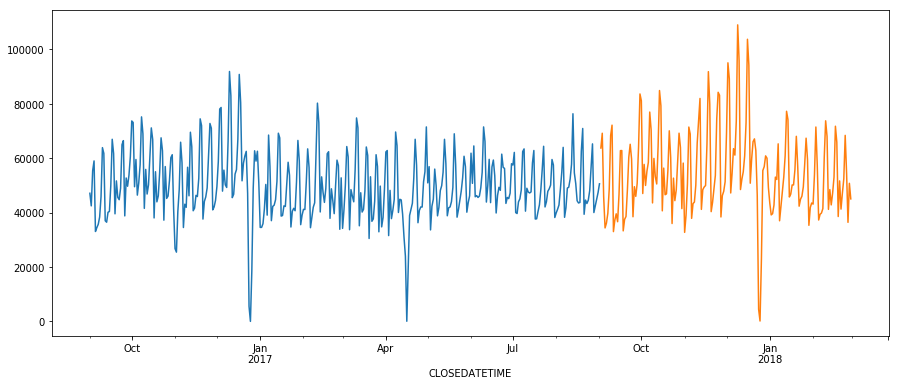

In [5]:
train.plot()
test.plot()

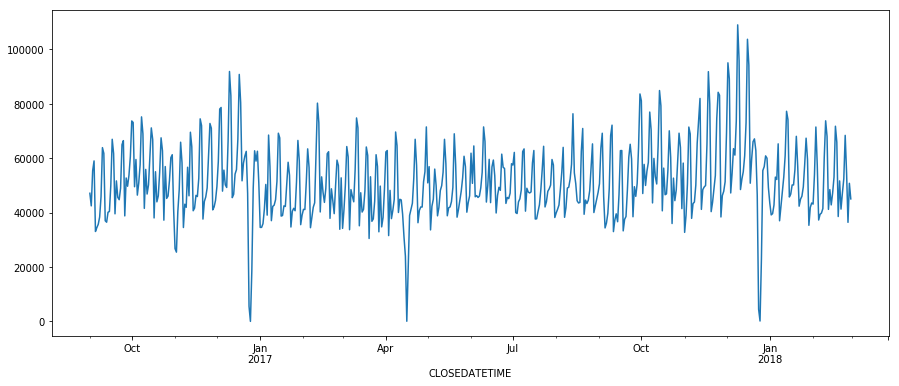

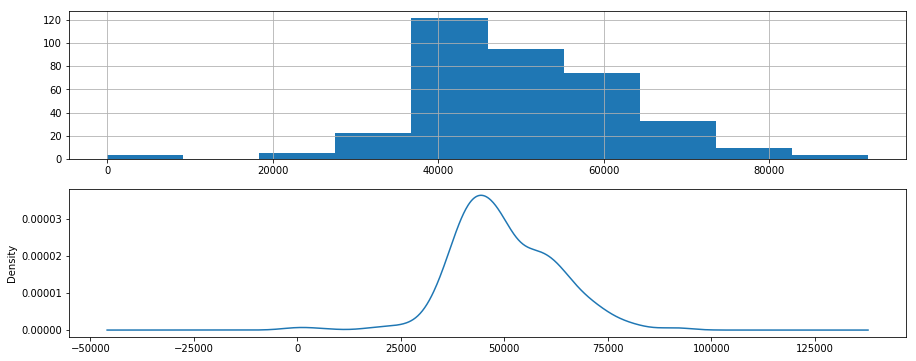

In [6]:
# Gestość obserwacji
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
train.hist()
pyplot.subplot(212)
train.plot(kind='kde')

ADF Statistic: -4.336690
p-value: 0.000384
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


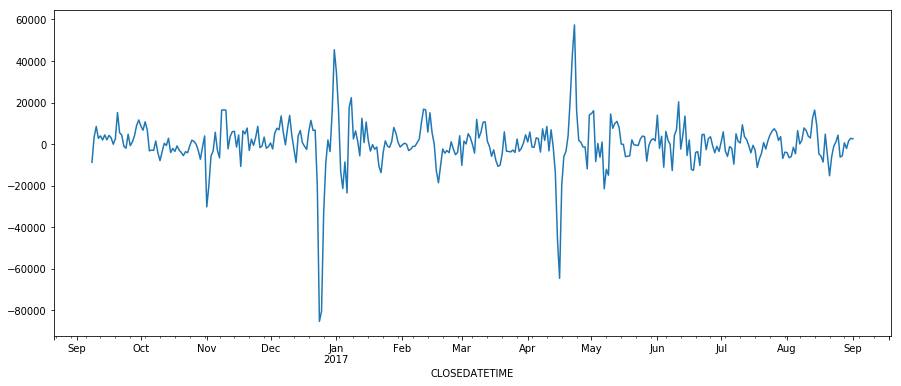

In [28]:
from pandas import Series
from pandas.core import datetools
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
# tworzenie zroznicowanego szeregu czasowego
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
series = train
X = series.values
X = X.astype('float32')
# różnicowanie danych
seasonal_interval = 7
stationary = difference(X, seasonal_interval)
stationary.index = series.index[seasonal_interval:]
# sprawdzanie stacjonarności
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# zapisujemy dane, przydadzą się później
stationary.to_csv('stationary.csv')
# rysowanie
stationary.plot()

/home/pawelglica/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


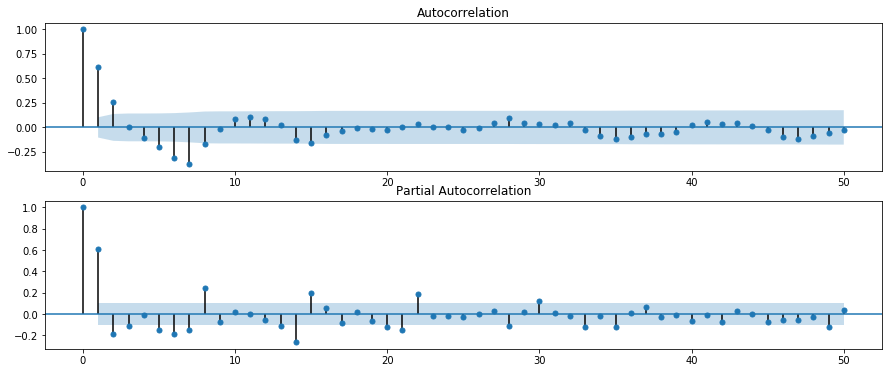

In [29]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = Series.from_csv('stationary.csv')

pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca(), lags=50)
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca(), lags=50)
pyplot.show()

In [ ]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# oecena moelu ARIMA na baze parametrów (p,d,q)
def evaluate_arima_model(X, arima_order):
	history = [x for x in train]
	# prognozuj
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# obliczanie mse
	error = mean_squared_error(test, predictions)
	return error

# ocenianie parametrów p,d,q w dmodelu ARIMA
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,sqrt(mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, sqrt(best_score))

# wybrany szereg czasowy
series = all
# zbiory parametrów do oceny
p_values = [1, 2, 6, 7, 8, 14]
d_values = [0]
q_values = [1, 2, 4, 5, 6, 7]
warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

In [34]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# zrożnicowane serie
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# odwracanie różnicowania
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# naiwna prognoza
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# róznicowanie danych
	seasonal_interval = 7
	diff = difference(history, seasonal_interval)
	# prognozowanie
	model = ARIMA(diff, order=(14,0,4))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, seasonal_interval)
	predictions.append(yhat)
	# obserwacje
	obs = test[i]
	history.append(obs)
	print('>Prognoza=%.3f, Oczekiwanie=%3.f' % (yhat, obs))
# wynik jakosci 
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


>Predicted=59993.310, Expected=63758
>Predicted=70494.469, Expected=69193
>Predicted=44748.223, Expected=45909
>Predicted=46561.738, Expected=34367
>Predicted=34806.163, Expected=36159
>Predicted=41302.008, Expected=39768
>Predicted=47120.083, Expected=48734
>Predicted=62948.854, Expected=68305
>Predicted=74161.123, Expected=72163
>Predicted=45039.492, Expected=33014
>Predicted=30114.156, Expected=37264
>Predicted=39502.510, Expected=39556
>Predicted=44987.228, Expected=36652
>Predicted=44045.293, Expected=46688


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=62008.685, Expected=62798
>Predicted=70545.304, Expected=62827
>Predicted=32854.678, Expected=33284
>Predicted=34419.915, Expected=37526
>Predicted=41876.133, Expected=38562
>Predicted=40033.468, Expected=48279
>Predicted=54481.631, Expected=60369
>Predicted=71580.001, Expected=65135
>Predicted=63786.106, Expected=59700


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=31734.194, Expected=38476
>Predicted=38621.678, Expected=49533
>Predicted=45894.163, Expected=45980
>Predicted=50140.141, Expected=50725


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=56723.118, Expected=64123
>Predicted=67896.351, Expected=83636
>Predicted=78672.320, Expected=81126
>Predicted=47320.834, Expected=47021
>Predicted=43449.560, Expected=57733
>Predicted=51942.835, Expected=49988
>Predicted=53758.695, Expected=55243
>Predicted=58349.871, Expected=58455
>Predicted=71194.814, Expected=76981
>Predicted=78118.485, Expected=70427
>Predicted=40706.756, Expected=43564
>Predicted=48409.677, Expected=59931
>Predicted=54689.764, Expected=53201
>Predicted=59821.417, Expected=50530
>Predicted=55468.158, Expected=64410
>Predicted=75998.578, Expected=84897
>Predicted=77641.842, Expected=79305
>Predicted=49237.532, Expected=40651
>Predicted=51515.467, Expected=56371
>Predicted=48035.786, Expected=46571
>Predicted=50621.709, Expected=46891
>Predicted=60515.125, Expected=55436
>Predicted=77130.305, Expected=70081
>Predicted=70451.360, Expected=60317
>Predicted=34578.221, Expected=35991
>Predicted=54493.935, Expected=52686
>Predicted=46886.061, Expected=44404
>

/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=73718.839, Expected=69354
>Predicted=81256.512, Expected=95086
>Predicted=86979.511, Expected=89202
>Predicted=47956.448, Expected=47224
>Predicted=48191.292, Expected=54502
>Predicted=51962.612, Expected=63529
>Predicted=61508.879, Expected=61147
>Predicted=75164.671, Expected=73694
>Predicted=90868.301, Expected=109044
>Predicted=97244.219, Expected=95958


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=49691.464, Expected=48485
>Predicted=51845.932, Expected=52286
>Predicted=55450.209, Expected=55024
>Predicted=56972.879, Expected=60846
>Predicted=78156.440, Expected=73097
>Predicted=99587.014, Expected=103747
>Predicted=91718.701, Expected=94242
>Predicted=50701.380, Expected=50815
>Predicted=55858.421, Expected=59716
>Predicted=56900.871, Expected=66087
>Predicted=65462.091, Expected=67119
>Predicted=79747.444, Expected=62830
>Predicted=92099.219, Expected=46451
>Predicted=50250.806, Expected=4433
>Predicted=-10403.977, Expected=137
>Predicted=38564.843, Expected=22930
>Predicted=51476.150, Expected=55484
>Predicted=64397.062, Expected=56897
>Predicted=64183.247, Expected=60864
>Predicted=70405.668, Expected=59994
>Predicted=35738.194, Expected=49217
>Predicted=24411.002, Expected=43458
>Predicted=55155.468, Expected=39163
>Predicted=53168.887, Expected=39611
>Predicted=38532.542, Expected=42807
>Predicted=46118.675, Expected=53057
>Predicted=67782.598, Expected=52178
>P

/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=65254.435, Expected=74216
>Predicted=39075.671, Expected=45747
>Predicted=41277.280, Expected=46810
>Predicted=57155.223, Expected=50162


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=48338.659, Expected=50179


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=56390.138, Expected=55781
>Predicted=71113.519, Expected=68061
>Predicted=65324.936, Expected=56913
>Predicted=34850.186, Expected=42366
>Predicted=50093.338, Expected=44937
>Predicted=46926.663, Expected=46030
>Predicted=46713.209, Expected=49449
>Predicted=61101.789, Expected=57820
>Predicted=64529.944, Expected=67376
>Predicted=61447.863, Expected=59593
>Predicted=42066.193, Expected=35330
>Predicted=38240.715, Expected=41920
>Predicted=43327.395, Expected=43542
>Predicted=50834.854, Expected=43139
>Predicted=51947.961, Expected=54092
>Predicted=65520.105, Expected=71480
>Predicted=67801.019, Expected=57368
>Predicted=36225.874, Expected=37279
>Predicted=39133.596, Expected=39373
>Predicted=45124.132, Expected=39850
>Predicted=43377.152, Expected=41473
>Predicted=51047.584, Expected=60336
>Predicted=74584.318, Expected=73760
>Predicted=60690.604, Expected=68029
>Predicted=44318.237, Expected=41193
>Predicted=42277.155, Expected=48465
>Predicted=44708.359, Expected=42837
>

ARIMA(5, 0, 5) RMSE=12222.125
ARIMA(5, 0, 11) RMSE=9724.251
ARIMA(6, 0, 9) RMSE=10176.906
ARIMA(6, 0, 10) RMSE=9838.775
ARIMA(6, 0, 11) RMSE=9764.582
ARIMA(7, 0, 7) RMSE=10695.650
ARIMA(7, 0, 10) RMSE=9862.784
ARIMA(7, 0, 11) RMSE=9820.115
ARIMA(8, 0, 5) RMSE=11278.769
ARIMA(8, 0, 6) RMSE=11347.758
ARIMA(8, 0, 7) RMSE=11419.697
ARIMA(8, 0, 10) RMSE=9595.443
ARIMA(8, 0, 11) RMSE=9843.728
ARIMA(9, 0, 6) RMSE=11223.434
ARIMA(9, 0, 7) RMSE=11501.492
Best ARIMA(8, 0, 10) RMSE=9595.443


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/pyt

                  0
count    180.000000
mean      60.793873
std     8598.505087
min   -45818.256403
25%    -3614.446286
50%      227.249174
75%     4518.760162
max    19046.888013


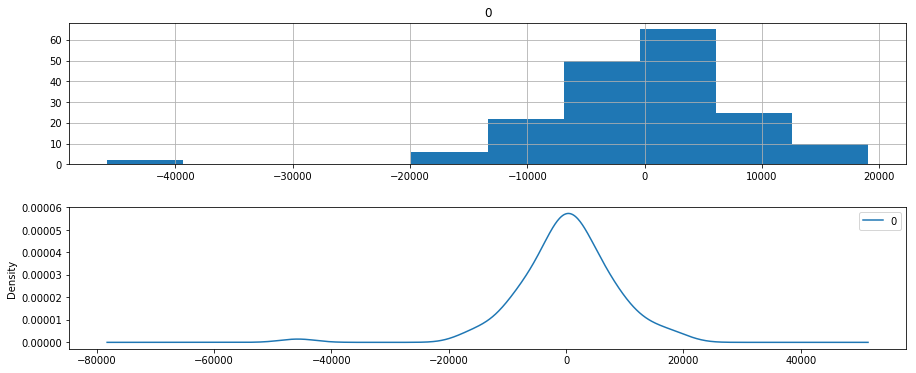

In [35]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# zrożnicowane serie
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# odwracanie różnicowania
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# naiwna prognoza
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# róznicowanie danych
	seasonal_interval = 7
	diff = difference(history, seasonal_interval)
	# prognozowanie
	model = ARIMA(diff, order=(14,0,4))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, seasonal_interval)
	predictions.append(yhat)
	# obserwacje
	obs = test[i]
	history.append(obs)
# błędy
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# wykres
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/pyt

RMSE: 8574.581
                  0
count    180.000000
mean      -0.003047
std     8598.499048
min   -45878.989952
25%    -3675.261682
50%      166.475830
75%     4457.694846
max    18985.937347


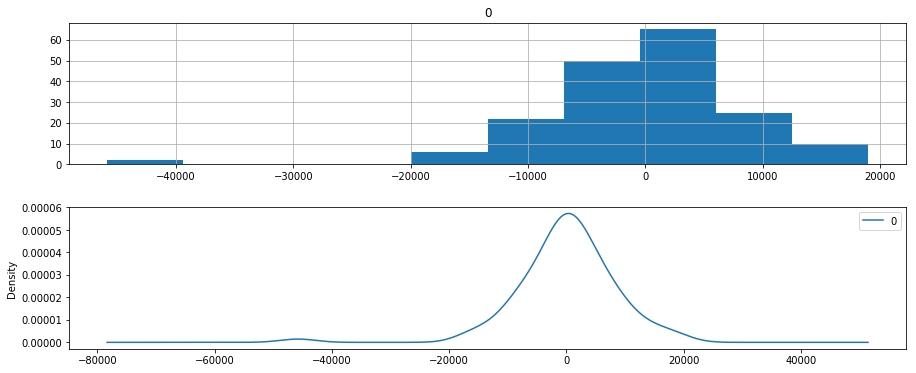

In [36]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# zrożnicowane serie
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# odwracanie różnicowania
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# naiwna prognoza
history = [x for x in train]
predictions = list()
bias = 60.793873
for i in range(len(test)):
	# róznicowanie danych
	seasonal_interval = 7
	diff = difference(history, seasonal_interval)
	# prognozowanie
	model = ARIMA(diff, order=(14,0,4))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, seasonal_interval)
	predictions.append(yhat)
	# obserwacje
	obs = test[i]
	history.append(obs)
# błędy
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# wykres
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/pyt

                  0
count    180.000000
mean      60.790826
std     8598.499048
min   -45818.196079
25%    -3614.467809
50%      227.269703
75%     4518.488719
max    19046.731220


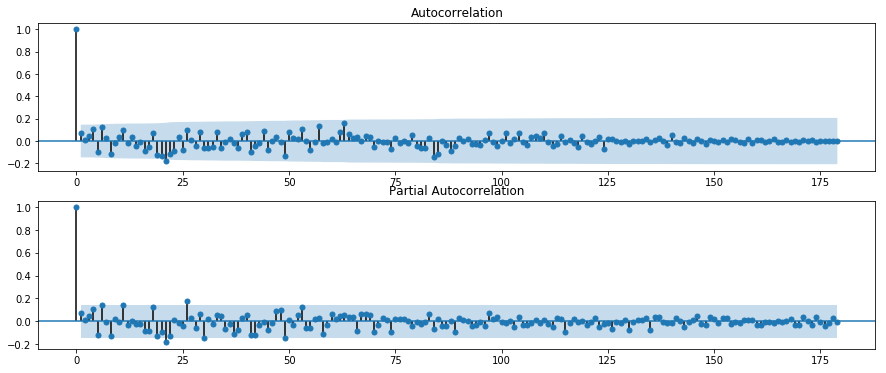

In [62]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# zrożnicowane serie
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# odwracanie różnicowania
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# naiwna prognoza
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# różnicowanie danych
	seasonal_interval = 7
	diff = difference(history, seasonal_interval)
	# prognozowanie
	model = ARIMA(diff, order=(14,0,4))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, seasonal_interval)
	predictions.append(yhat)
	# obserwacje
	obs = test[i]
	history.append(obs)
# błędy
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# wykres
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [61]:
# finalizacja

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
import time
import datetime
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print("Przed",st)

# poprawa błedów przy zapisie i ładowaniu modelu - bug
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# zrożnicowane serie
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# wybranie szeregu czasowego
series = all
# przygotowanie danych
X = series.values
X = X.astype('float32')
# difference data
seasonal_interval = 7
diff = difference(X, seasonal_interval)
# dopasowanie modelu
model = ARIMA(diff, order=(14,0,4))
model_fit = model.fit(trend='nc', disp=0)
# poprawka, stała wyliczona z błedu losowego średniej
bias = 60.793873
# zapisanie modelu i poprawki 
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])
ts2 = time.time()
st2 = datetime.datetime.fromtimestamp(ts2).strftime('%Y-%m-%d %H:%M:%S')
print("Po",st2) 

Przed 2018-08-23 12:42:34


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Po 2018-08-23 12:42:57


In [64]:
# prognozowanie

from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
import time
import datetime
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print("Przed",st)
 
# odwracanie różnicowania
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
series = test
seasonal_interval = 7
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, seasonal_interval)
print('Prognoza: %.3f' % yhat)
ts2 = time.time()
st2 = datetime.datetime.fromtimestamp(ts2).strftime('%Y-%m-%d %H:%M:%S')
print("Po",st2) 

Przed 2018-08-23 14:08:12
Prognoza: 46988.369
Po 2018-08-23 14:08:12


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


>Predicted=46988.369, Expected=63758


/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/pawelglica/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


>Predicted=67728.405, Expected=69193
>Predicted=79889.861, Expected=45909
>Predicted=36997.809, Expected=34367
>Predicted=19634.222, Expected=36159
>Predicted=56340.354, Expected=39768
>Predicted=36942.192, Expected=48734
>Predicted=61460.083, Expected=68305
>Predicted=68911.121, Expected=72163
>Predicted=60854.974, Expected=33014
>Predicted=30805.272, Expected=37264
>Predicted=32067.886, Expected=39556
>Predicted=48699.618, Expected=36652
>Predicted=42153.276, Expected=46688
>Predicted=63876.135, Expected=62798
>Predicted=59393.318, Expected=62827
>Predicted=43650.478, Expected=33284
>Predicted=39841.742, Expected=37526
>Predicted=32367.539, Expected=38562
>Predicted=42546.591, Expected=48279
>Predicted=54739.851, Expected=60369
>Predicted=70176.709, Expected=65135
>Predicted=63122.019, Expected=59700
>Predicted=33722.646, Expected=38476
>Predicted=38891.296, Expected=49533
>Predicted=45407.905, Expected=45980
>Predicted=50164.513, Expected=50725
>Predicted=56853.204, Expected=64123
>

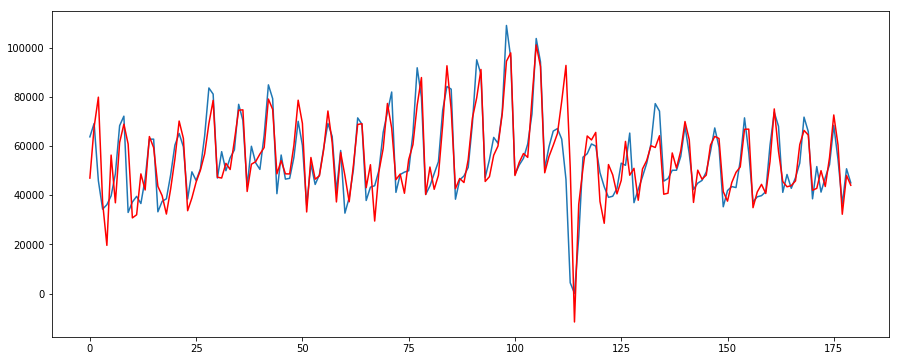

In [45]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# zrożnicowane serie
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# odwracanie różnicowania
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# ładowanie i przygotowanie szeregów danych
dataset = all
X = dataset.values.astype('float32')
history = [x for x in X]
seasonal_interval = 7
validation = test
y = validation.values.astype('float32')
# ładowanie modelu
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# pierwsza prognoza
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, seasonal_interval)
predictions.append(yhat)
history.append(y[0])
print('>Prognoza=%.3f, Oczekiwanie=%3.f' % (yhat, y[0]))
# kolejne prognozy
for i in range(1, len(y)):
	# rózncowanie danych
	seasonal_interval = 7
	diff = difference(history, seasonal_interval)
	# prognozowanie
	model = ARIMA(diff, order=(14,0,4))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, seasonal_interval)
	predictions.append(yhat)
	# obserwacje
	obs = y[i]
	history.append(obs)
	print('>Prognoza=%.3f, Oczekiwanie=%3.f' % (yhat, obs))
# wynik jakości modelu
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()